In [2]:
from datetime import datetime
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as pyplot
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
data = pd.read_csv('./data.csv')

In [3]:
data.shape

(1304543, 23)

In [7]:
data.columns =['MeterNo','AccountName','AccountType','BillCycle','BillCycleID','Date','DateStr',
               'Event','ExceptionType','ExceptionTypeDesc',
               'MeterType','MeterReadType','MeterReadTypeDesc','PremiseName','ServicePt',
               'UOM','UOMName','TimeStamp','CurrBillCycle',
               'DateId','Value1','Value2','Record_count']

In [8]:
data.head(5)

,MeterNo,AccountName,AccountType,BillCycle,BillCycleID,Date,DateStr,Event,ExceptionType,ExceptionTypeDesc,...,PremiseName,ServicePt,UOM,UOMName,TimeStamp,CurrBillCycle,DateId,Value1,Value2,Record_count
0,1679,Thane,RESIDENTIAL,BILL CYCLE 10,BC10,2017-02-03,20170203,NONE,NONE,NONE,...,33rd Street,SP33,kw,kilowatts,21:45:00,0,34,0.2740,NaN,1
1,1679,Thane,RESIDENTIAL,BILL CYCLE 10,BC10,2017-03-15,20170315,NONE,NONE,NONE,...,33rd Street,SP33,kw,kilowatts,22:15:00,0,74,0.6577,NaN,1
2,1679,Thane,RESIDENTIAL,BILL CYCLE 10,BC10,2017-01-19,20170119,NONE,NONE,NONE,...,33rd Street,SP33,kw,kilowatts,22:00:00,0,19,0.9483,NaN,1
3,1679,Thane,RESIDENTIAL,BILL CYCLE 10,BC10,2017-03-21,20170321,NONE,NONE,NONE,...,33rd Street,SP33,kw,kilowatts,21:30:00,0,80,0.8360,NaN,1
4,1679,Thane,RESIDENTIAL,BILL CYCLE 10,BC10,2017-03-18,20170318,NONE,NONE,NONE,...,33rd Street,SP33,kw,kilowatts,22:45:00,0,77,0.9974,NaN,1


In [9]:
data[data['ExceptionType'] != 'NONE']
data[data['ExceptionType'] != 'NONE'].count()

MeterNo              242
AccountName          242
AccountType          242
BillCycle            242
BillCycleID          242
Date                 242
DateStr              242
Event                242
ExceptionType        242
ExceptionTypeDesc    242
MeterType            242
MeterReadType        242
MeterReadTypeDesc    242
PremiseName          242
ServicePt            242
UOM                  242
UOMName              242
TimeStamp            242
CurrBillCycle        242
DateId               242
Value1               242
Value2                 0
Record_count         242
dtype: int64

In [12]:
print(data['AccountType'].unique())
print(data['BillCycleID'].unique())
print(data['Event'].unique())
print(data['ExceptionType'].unique())
print(data['MeterType'].unique())
print(data['MeterReadTypeDesc'].unique())

['RESIDENTIAL' 'COMMERCIAL' 'INDUSTRIAL']
['BC10' 'BC16' 'BC5' 'BC15' 'BC4' 'BC8' 'BC7' 'BC22' 'BC21' 'BC3' 'BC20'
 'BC2' 'BC14' 'BC19' 'BC18' 'BC13' 'BC1' 'BC17' 'BC12' 'BC11' 'BC9' 'BC6']
['NONE' 'Opened' 'Changed' 'LossDetected' 'Reset' 'Error' 'Cleared'
 'MinLimitReached' 'Stopped' 'Failed']
['NONE' 'Security' 'Configuration Failure' 'Power Outage'
 'Inaccurate Reading/Data Collection Failure' 'Firmware Failure'
 'Service/Meter Type Mismatch' 'Battery Failure' 'Communication Failure'
 'Meter Clock Failure']
['E']
['ACTUAL' 'MISSING' 'ESTIMATED']


In [6]:
data.dtypes

MeterNo                int64
AccountName           object
AccountType           object
BillCycle             object
BillCycleID           object
Date                  object
DateStr                int64
Event                 object
ExceptionType         object
ExceptionTypeDesc     object
MeterType             object
MeterReadType         object
MeterReadTypeDesc     object
ServicePt             object
UOM                   object
UOMName               object
TimeStamp             object
CurrBillCycle          int64
PremiseName           object
Latitude             float64
Longitude            float64
DateId                 int64
Value1               float64
Value2               float64
Record_count           int64
dtype: object

In [13]:
data['MeterNo'] = data['MeterNo'].astype('str')
data['AccountType'] = data['AccountType'].astype('category')
data['BillCycleID'] = data['BillCycleID'].astype('category')
data['Event'] = data['Event'].astype('category')
data['ExceptionTypeDesc'] = data['ExceptionTypeDesc'].astype('category')
data['MeterReadTypeDesc'] = data['MeterReadTypeDesc'].astype('category')

## Visualize Example Time Series

In [63]:
df_thane = data[data['AccountName']=='Thane'].copy()
df_thane = df_thane[['Date','TimeStamp','Value1']]

In [84]:
df_thane['DateTime'] = df_thane.apply(lambda r: r['Date'] + ' ' + r['TimeStamp'], axis = 1)
df_thane['DateTime'] = pd.to_datetime(df_thane['DateTime'])

In [103]:
gb_thane = df_thane.groupby([df_thane['DateTime'].dt.year, df_thane['DateTime'].dt.month, df_thane['DateTime'].dt.day]) 

In [104]:
groups = dict(list(gb_thane))

In [122]:
dates = groups.keys()

In [127]:
X_datetime = np.asarray([datetime(*dates[i]) for i in range(len(dates))])

In [138]:
X_datetime.shape

(136,)

In [137]:
X_values = np.asarray([gb_thane.get_group(dates[i]).mean()[0] for i in range(len(dates))])
X_values.shape

(136,)

In [144]:
# sort by datetime
p = X_datetime.argsort()
X_datetime = X_datetime[p]
X_values = X_values[p]

In [75]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,15

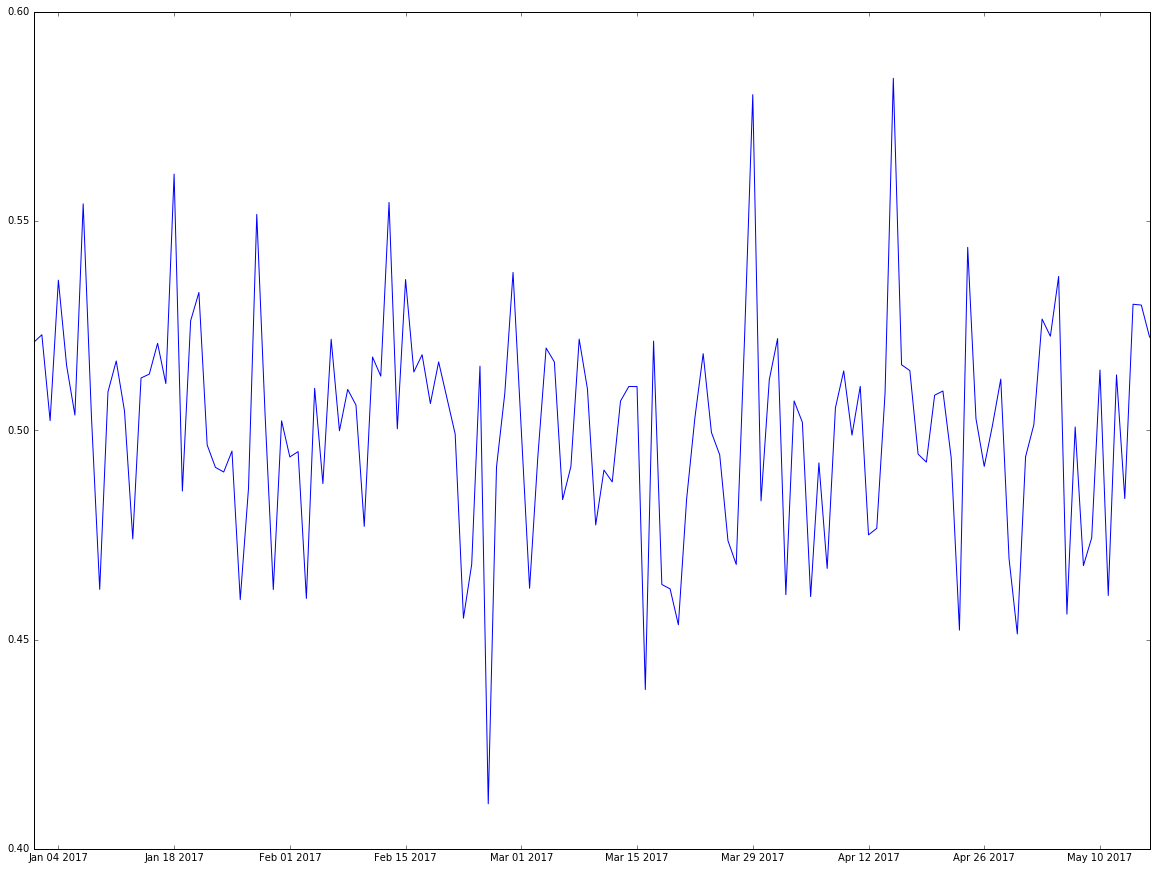

In [146]:
plt.plot(X_datetime, X_values)
plt.show()

## Create Training/Testing Set for One Class SVM

In [27]:
# testing to see if we can remove a random sample

df_train = data[data['ExceptionType'] == 'NONE'].copy()
df_242 = df_train.sample(n=242)
print('Original:', df_train.shape)
print('After sample: ', df_train.drop(df_train.index[df_242.index]).shape)

('Original:', (1304301, 23))
('After sample: ', (1304059, 23))


In [28]:
# remove for real
df_train.drop(df_train.index[df_242.index], inplace = True)

In [34]:
df_train.shape

(1304059, 23)

In [29]:
# create test dataframe
df_test = data[data['ExceptionType'] != 'NONE'].copy()

In [31]:
df_test = df_test.append(df_242)

In [33]:
df_test.shape

(484, 23)

In [36]:
df_train

,MeterNo,AccountName,AccountType,BillCycle,BillCycleID,Date,DateStr,Event,ExceptionType,ExceptionTypeDesc,...,PremiseName,ServicePt,UOM,UOMName,TimeStamp,CurrBillCycle,DateId,Value1,Value2,Record_count
0,1679,Thane,RESIDENTIAL,BILL CYCLE 10,BC10,2017-02-03,20170203,NONE,NONE,NONE,...,33rd Street,SP33,kw,kilowatts,21:45:00,0,34,0.2740,NaN,1
1,1679,Thane,RESIDENTIAL,BILL CYCLE 10,BC10,2017-03-15,20170315,NONE,NONE,NONE,...,33rd Street,SP33,kw,kilowatts,22:15:00,0,74,0.6577,NaN,1
2,1679,Thane,RESIDENTIAL,BILL CYCLE 10,BC10,2017-01-19,20170119,NONE,NONE,NONE,...,33rd Street,SP33,kw,kilowatts,22:00:00,0,19,0.9483,NaN,1
3,1679,Thane,RESIDENTIAL,BILL CYCLE 10,BC10,2017-03-21,20170321,NONE,NONE,NONE,...,33rd Street,SP33,kw,kilowatts,21:30:00,0,80,0.8360,NaN,1
4,1679,Thane,RESIDENTIAL,BILL CYCLE 10,BC10,2017-03-18,20170318,NONE,NONE,NONE,...,33rd Street,SP33,kw,kilowatts,22:45:00,0,77,0.9974,NaN,1
5,1679,Thane,RESIDENTIAL,BILL CYCLE 10,BC10,2017-02-19,20170219,NONE,NONE,NONE,...,33rd Street,SP33,kw,kilowatts,23:15:00,0,50,0.7621,NaN,1
6,1679,Thane,RESIDENTIAL,BILL CYCLE 10,BC10,2017-03-22,20170322,NONE,NONE,NONE,...,33rd Street,SP33,kw,kilowatts,22:00:00,0,81,0.6813,NaN,1
7,1679,Thane,RESIDENTIAL,BILL CYCLE 10,BC10,2017-03-20,20170320,NONE,NONE,NONE,...,33rd Street,SP33,kw,kilowatts,22:45:00,0,79,0.1046,NaN,1
8,1679,Thane,RESIDENTIAL,BILL CYCLE 10,BC10,2017-01-30,20170130,NONE,NONE,NONE,...,33rd Street,SP33,kw,kilowatts,23:00:00,0,30,0.7415,NaN,1
9,1290,Kai,COMMERCIAL,BILL CYCLE 16,BC16,2017-02-22,20170222,NONE,NONE,NONE,...,17th Street,SP17,kw,kilowatts,08:45:00,0,53,1.9885,NaN,1


In [39]:
# shuffle dataframes

from sklearn.utils import shuffle

df_train = shuffle(df_train)
df_test = shuffle(df_test)

## Feature Engineering

In [41]:
X_train = np.asarray(df_train['Value1'])

X_test = np.asarray(df_test['Value1'])
y_test = np.asarray(df_test['ExceptionType'].apply(lambda k: 1 if k != 'NONE' else 0))

In [43]:
X_train

array([ 0.553 ,  0.4081,  1.6358, ...,  0.6938,  0.0498,  0.4084])

In [47]:
X_test

array([  0.00000000e+00,   7.12000000e-01,   1.10100000e+00,
         1.69220000e+00,   6.26500000e-01,   1.86270000e+00,
         0.00000000e+00,   2.08400000e+00,   7.95450000e+00,
         1.95810000e+00,   4.98400000e-01,   0.00000000e+00,
         1.91760000e+00,   8.14000000e-01,   5.97500000e-01,
         7.21200000e-01,   1.13980000e+00,   4.93200000e-01,
         6.87200000e-01,   9.53400000e-01,   3.10600000e-01,
         1.20650000e+00,   5.27100000e-01,   0.00000000e+00,
         1.84260000e+00,   6.95890000e+00,   6.14100000e-01,
         1.10910000e+00,   2.93650000e+00,   5.65920000e+00,
         8.77200000e-01,   1.76330000e+00,   1.92930000e+00,
         9.92300000e-01,   8.17100000e-01,   0.00000000e+00,
         8.57000000e-02,   2.63600000e-01,   0.00000000e+00,
         1.87660000e+00,   1.09070000e+00,   6.29100000e-01,
         0.00000000e+00,   0.00000000e+00,   1.94190000e+00,
         0.00000000e+00,   0.00000000e+00,   2.26590000e+00,
         9.16000000e-02,

In [48]:
y_test

array([1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1,

## Train One Class SVM

In [ ]:
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)